## SPRINT 2 - TEAM ID : PNT2022TMID00681

TEAM MEMBERS : SOWMIYA K[Team Leader]  

B.SHALINI

V.PUVIYAAL

S.SIVAPRIYA

##            MODEL BUILDING FOR FRUIT DISEASE PREDICTION

## Image Augumentation

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [3]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/fruit-dataset/fruit-dataset/train",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 5384 images belonging to 6 classes.


In [5]:
x_test=test_datagen.flow_from_directory(r'/content/drive/MyDrive/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/fruit-dataset/fruit-dataset/test',target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 1686 images belonging to 6 classes.


## ADDING CNN 

In [6]:
from tensorflow.keras.models import Sequential

In [7]:
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [10]:
model=Sequential()

## HIDDEN LAYERS

In [11]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
model.add(Flatten())

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.add(Dense(300,activation='relu'))

In [17]:
model.add(Dense(150,activation='relu'))

## OUTPUT LAYER

In [18]:
model.add(Dense(9,activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
len(x_train)

225

In [21]:
import matplotlib.pyplot

## SAVING MODEL

In [22]:
model.save('fdata.h5')

## TEST THE MODEL

In [23]:
import numpy as np

In [24]:
from tensorflow.keras.models import load_model

In [25]:
from tensorflow.keras.preprocessing import image

In [26]:
model=load_model('fdata.h5')

## TEST 1:

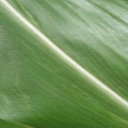

In [33]:
img=image.load_img(r"/content/drive/MyDrive/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Corn_(maize)___healthy/0f3ce24e-fcf4-4738-94db-dc39881c0c73___R.S_HL 8038 copy.jpg",target_size=(128,128))
img

In [34]:
x=image.img_to_array(img)

In [35]:
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 46ms/step


In [46]:
index=['Apple___Black_rot','Corn_(maize)___healthy','Corn_(maize)___Northern_Leaf_Blight','Apple___healthy','Peach___Bacterial_spot','Peach___healthy']
index[0]

'Apple___Black_rot'

# TEST 2:

In [39]:
img=image.load_img(r"/content/drive/MyDrive/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Peach___Bacterial_spot/0a71ba91-8bde-4a91-84a9-bf950488f718___Rutg._Bact.S 2121.JPG",target_size=(128,128))

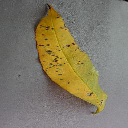

In [40]:
img

In [41]:
x=image.img_to_array(img)

In [42]:
x=np.expand_dims(x,axis=0)

In [43]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 58ms/step


In [45]:
index=['Apple___Black_rot','Peach___Bacterial_spot','Corn_(maize)___Northern_Leaf_Blight','Apple___healthy','Corn_(maize)___healthy','Peach___healthy']
index[0]

'Apple___Black_rot'